In [ ]:
!pip install u8darts[all] --quiet


In [ ]:
# 1. ÎÇ†Ïßú + ÏãúÍ∞Ñ ‚Üí ÏÑ∏Î°úÌòï Î≥ÄÌôò
df_long = df.melt(id_vars='ÎÇ†Ïßú', var_name='ÏãúÍ∞Ñ', value_name='ÏàòÏöîÎüâ(MWh)')
df_long['ÏãúÍ∞Ñ'] = df_long['ÏãúÍ∞Ñ'].str.replace('Ïãú', '').astype(int)

# 2. ÎÇ†Ïßú + ÏãúÍ∞Ñ Ìï©Ï≥êÏÑú datetime ÏÉùÏÑ±
df_long['ÏùºÏãú'] = pd.to_datetime(df_long['ÎÇ†Ïßú']) + pd.to_timedelta(df_long['ÏãúÍ∞Ñ'] - 1, unit='h')

# 3. ProphetÏö© Ìè¨Îß∑ÏúºÎ°ú Î≥ÄÌôò
df_prophet = df_long[['ÏùºÏãú', 'ÏàòÏöîÎüâ(MWh)']].rename(columns={'ÏùºÏãú': 'ds', 'ÏàòÏöîÎüâ(MWh)': 'y'})


In [ ]:
!pip install lightgbm matplotlib pandas seaborn statsmodels --quiet


In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
# -- 2. Îç∞Ïù¥ÌÑ∞ Î∂àÎü¨Ïò§Í∏∞ Î∞è Ï†ÑÏ≤òÎ¶¨ (long Î≥ÄÌôò) --
import pandas as pd

df = pd.read_csv("/content/drive/MyDrive/ColabNotebooks/ÌïúÍµ≠Ï†ÑÎ†•Í±∞ÎûòÏÜå_ÏãúÍ∞ÑÎ≥Ñ Ï†ÑÍµ≠ Ï†ÑÎ†•ÏàòÏöîÎüâ_20241231.csv", encoding='cp949')
df_long = df.melt(id_vars='ÎÇ†Ïßú', var_name='ÏãúÍ∞Ñ', value_name='ÏàòÏöîÎüâ(MWh)')
df_long['ÏãúÍ∞Ñ_num'] = df_long['ÏãúÍ∞Ñ'].str.replace('Ïãú', '').astype(int)
df_long['ÏùºÏãú'] = pd.to_datetime(df_long['ÎÇ†Ïßú']) + pd.to_timedelta(df_long['ÏãúÍ∞Ñ_num'] % 24, unit='h')
df_long.loc[df_long['ÏãúÍ∞Ñ_num'] == 24, 'ÏùºÏãú'] += pd.Timedelta(days=1)
df_long = df_long[['ÏùºÏãú', 'ÏàòÏöîÎüâ(MWh)']].sort_values('ÏùºÏãú')


/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 49688 (\N{HANGUL SYLLABLE SU}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 50836 (\N{HANGUL SYLLABLE YO}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 47049 (\N{HANGUL SYLLABLE RYANG}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 51204 (\N{HANGUL SYLLABLE JEON}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 44397 (\N{HANGUL SYLLABLE GUG}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr

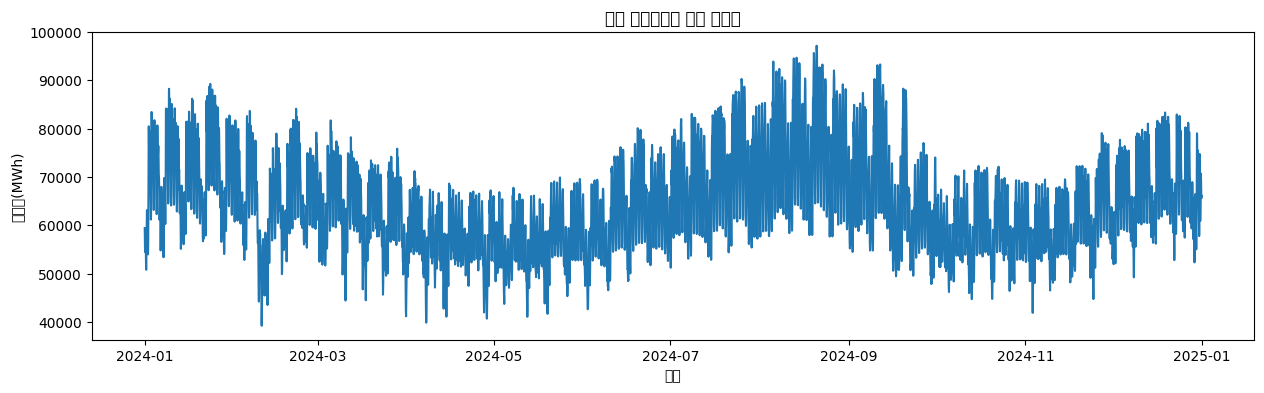

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 49688 (\N{HANGUL SYLLABLE SU}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 50836 (\N{HANGUL SYLLABLE YO}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 47049 (\N{HANGUL SYLLABLE RYANG}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 49884 (\N{HANGUL SYLLABLE SI}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 44036 (\N{HANGUL SYLLABLE GAN}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/l

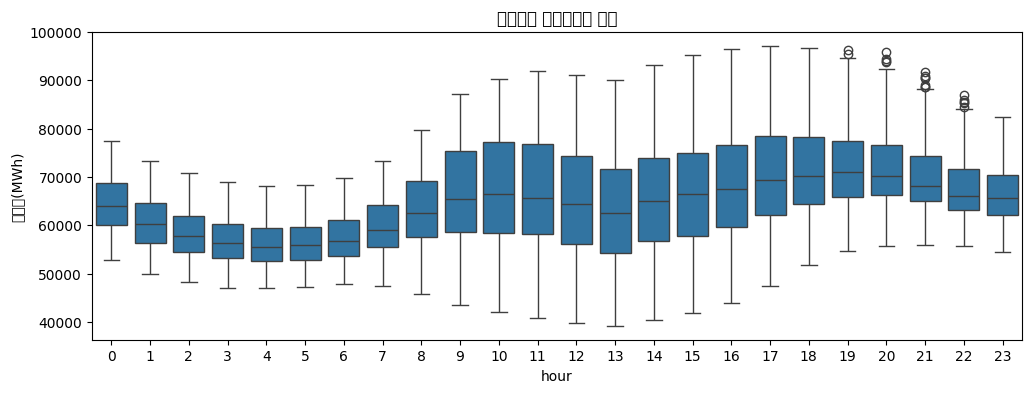

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 49688 (\N{HANGUL SYLLABLE SU}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 50836 (\N{HANGUL SYLLABLE YO}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 47049 (\N{HANGUL SYLLABLE RYANG}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 51068 (\N{HANGUL SYLLABLE IL}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 48324 (\N{HANGUL SYLLABLE BYEOL}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr

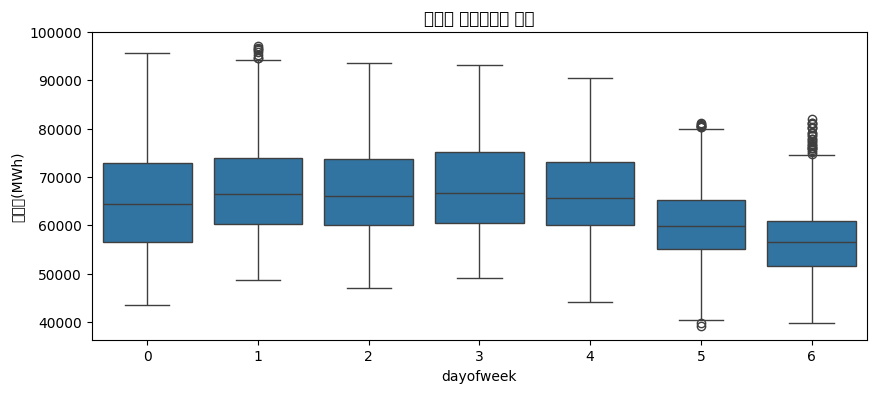

In [ ]:
# -- 3. Îç∞Ïù¥ÌÑ∞ EDA Î∞è ÏãúÍ∞ÅÌôî --
import matplotlib.pyplot as plt

df_long['hour'] = df_long['ÏùºÏãú'].dt.hour
df_long['dayofweek'] = df_long['ÏùºÏãú'].dt.dayofweek
df_long['month'] = df_long['ÏùºÏãú'].dt.month

plt.figure(figsize=(15,4))
plt.plot(df_long['ÏùºÏãú'], df_long['ÏàòÏöîÎüâ(MWh)'])
plt.title('Ï†ÑÍµ≠ Ï†ÑÎ†•ÏàòÏöîÎüâ Ï†ÑÏ≤¥ ÏãúÍ≥ÑÏó¥')
plt.xlabel('ÏùºÏãú')
plt.ylabel('ÏàòÏöîÎüâ(MWh)')
plt.show()

import seaborn as sns
plt.figure(figsize=(12,4))
sns.boxplot(x='hour', y='ÏàòÏöîÎüâ(MWh)', data=df_long)
plt.title('ÏãúÍ∞ÑÎåÄÎ≥Ñ Ï†ÑÎ†•ÏàòÏöîÎüâ Î∂ÑÌè¨')
plt.show()

plt.figure(figsize=(10,4))
sns.boxplot(x='dayofweek', y='ÏàòÏöîÎüâ(MWh)', data=df_long)
plt.title('ÏöîÏùºÎ≥Ñ Ï†ÑÎ†•ÏàòÏöîÎüâ Î∂ÑÌè¨')
plt.show()


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency h will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency h will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency h will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using

ARIMA MAE: 6743.72, RMSE: 8372.74


/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 51204 (\N{HANGUL SYLLABLE JEON}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 47141 (\N{HANGUL SYLLABLE RYEOG}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 49688 (\N{HANGUL SYLLABLE SU}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 50836 (\N{HANGUL SYLLABLE YO}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 50696 (\N{HANGUL SYLLABLE YE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/

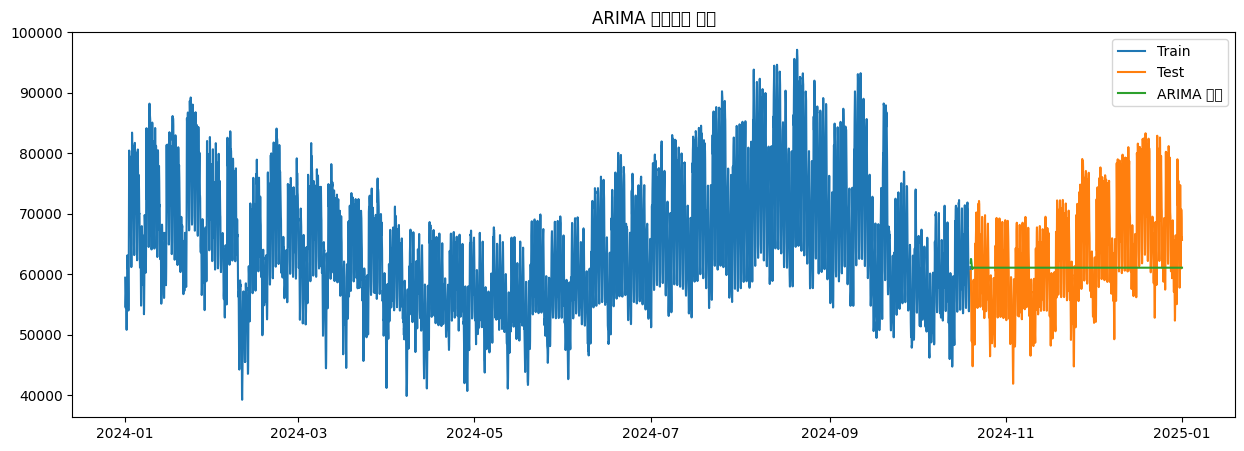

In [ ]:
# 3. ÏãúÍ≥ÑÏó¥ Î™®Îç∏ Ï†ÅÏö© Î∞è ÏÑ±Îä• ÎπÑÍµê
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np  # Ï∂îÍ∞Ä

# -- ARIMA ÏòàÏ∏° (Îã®Î≥ÄÎüâ) --
df_long2 = df_long.set_index('ÏùºÏãú')
split_idx = int(len(df_long2)*0.8)
train, test = df_long2.iloc[:split_idx], df_long2.iloc[split_idx:]

model = ARIMA(train['ÏàòÏöîÎüâ(MWh)'], order=(3,1,2))
model_fit = model.fit()
pred_arima = model_fit.forecast(steps=len(test))

mae_arima = mean_absolute_error(test['ÏàòÏöîÎüâ(MWh)'], pred_arima)
rmse_arima = np.sqrt(mean_squared_error(test['ÏàòÏöîÎüâ(MWh)'], pred_arima))  # ‚Üê ÏàòÏ†ï!
print(f"ARIMA MAE: {mae_arima:.2f}, RMSE: {rmse_arima:.2f}")

plt.figure(figsize=(15,5))
plt.plot(train.index, train['ÏàòÏöîÎüâ(MWh)'], label='Train')
plt.plot(test.index, test['ÏàòÏöîÎüâ(MWh)'], label='Test')
plt.plot(test.index, pred_arima, label='ARIMA ÏòàÏ∏°')
plt.legend()
plt.title('ARIMA Ï†ÑÎ†•ÏàòÏöî ÏòàÏ∏°')
plt.show()


In [ ]:
!pip install u8darts[all] --quiet


In [ ]:
from darts import TimeSeries

series = TimeSeries.from_dataframe(df_long, time_col='ÏùºÏãú', value_cols='ÏàòÏöîÎüâ(MWh)')


In [ ]:
#ÏãúÍ≥ÑÏó¥ Ï†ïÍ∑úÌôî
from darts.dataprocessing.transformers import Scaler
from sklearn.preprocessing import StandardScaler

scaler = Scaler(StandardScaler())
series_scaled = scaler.fit_transform(series)


In [ ]:
#Î™®Îç∏ ÏÑ†ÌÉù
from darts.models import DLinearModel, NLinearModel

model = DLinearModel(input_chunk_length=168, output_chunk_length=24)
# model = NLinearModel(input_chunk_length=168, output_chunk_length=24)


In [ ]:
#ÌïôÏäµ Î∞è ÏòàÏ∏°
model.fit(series_scaled[:-24])  # ÎßàÏßÄÎßâ ÌïòÎ£® ÎπºÍ≥† ÌïôÏäµ
forecast = model.predict(24)
forecast = scaler.inverse_transform(forecast)


INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.callbacks.model_summary:
  | Name            | Type             | Params | Mode 
-------------------------------------------------------------
0 | criterion       | MSELoss          | 0      | train
1 | train_criterion | MSELoss          | 0      | train
2 | val_criterion   | MSELoss          | 0      | train
3 | train_metrics   | MetricCollection | 0      | train
4 | val_metrics     | MetricCollection | 0      | train
5 | decomposition   | _SeriesDecomp    | 0      | train
6 | linear_seasonal | Linear           | 4.1 K  | train
7 | linear_trend    | Linear           | 4.1 K  | train
-------------------------------------------------------------
8.1 K     Trainable params
0         Non-trainable params
8.1 K     Total params
0.0

Training: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=100` reached.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs


Predicting: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs


Predicting: |          | 0/? [00:00<?, ?it/s]

<Axes: xlabel='ÏùºÏãú'>

/usr/local/lib/python3.11/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 51068 (\N{HANGUL SYLLABLE IL}) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
/usr/local/lib/python3.11/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 49884 (\N{HANGUL SYLLABLE SI}) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
/usr/local/lib/python3.11/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 51077 (\N{HANGUL SYLLABLE IB}) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
/usr/local/lib/python3.11/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 47141 (\N{HANGUL SYLLABLE RYEOG}) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
/usr/local/lib/python3.11/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 45936 (\N{HANGUL SYLLABLE DE}) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
/usr/local/lib/python3.11/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 51060 (\N{HANGUL SYLLABLE I}) missin

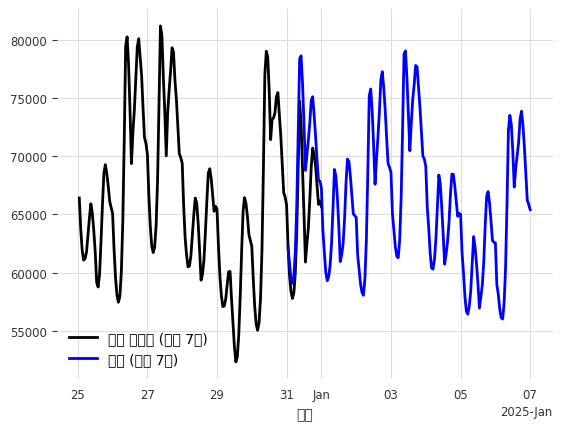

In [ ]:
# 7Ïùº ÏòàÏ∏°
forecast = model.predict(168)
forecast = scaler.inverse_transform(forecast)

# ÏûÖÎ†• Íµ¨Í∞ÑÎèÑ 7Ïùº
input_series = scaler.inverse_transform(series_scaled[-168:])

# ÏãúÍ∞ÅÌôî
input_series.plot(label="ÏûÖÎ†• Îç∞Ïù¥ÌÑ∞ (ÏµúÍ∑º 7Ïùº)", color="black")
forecast.plot(label="ÏòàÏ∏° (Îã§Ïùå 7Ïùº)", color="blue")


In [ ]:
#NLinear ÏòàÏ∏° (7Ïùº)
from darts.models import NLinearModel
from darts.dataprocessing.transformers import Scaler
from sklearn.preprocessing import StandardScaler

# 1. Ïä§ÏºÄÏùºÎßÅ (Ïù¥Ï†ÑÍ≥º ÎèôÏùº)
scaler = Scaler(StandardScaler())
series_scaled = scaler.fit_transform(series)

# 2. NLinear Î™®Îç∏ Ï†ïÏùò (ÏµúÍ∑º 7Ïùº ‚Üí Îã§Ïùå 7Ïùº ÏòàÏ∏°)
n_model = NLinearModel(input_chunk_length=168, output_chunk_length=168)

# 3. ÌïôÏäµ (ÎßàÏßÄÎßâ 7ÏùºÏùÄ ÏòàÏ∏°Ïö©ÏúºÎ°ú Ï†úÏô∏)
n_model.fit(series_scaled[:-168])

# 4. ÏòàÏ∏°
forecast_n = n_model.predict(168)
forecast_n = scaler.inverse_transform(forecast_n)

# 5. ÏûÖÎ†• ÏãúÍ≥ÑÏó¥ Î≥µÏõê
input_series = scaler.inverse_transform(series_scaled[-168:])


INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.callbacks.model_summary:
  | Name            | Type             | Params | Mode 
-------------------------------------------------------------
0 | criterion       | MSELoss          | 0      | train
1 | train_criterion | MSELoss          | 0      | train
2 | val_criterion   | MSELoss          | 0      | train
3 | train_metrics   | MetricCollection | 0      | train
4 | val_metrics     | MetricCollection | 0      | train
5 | layer           | Linear           | 28.4 K | train
-------------------------------------------------------------
28.4 K    Trainable params
0         Non-trainable params
28.4 K    Total params
0.114     Total estimated model params size (MB)
6         Modules in train mode
0         Modules in eval mode


Training: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=100` reached.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs


Predicting: |          | 0/? [00:00<?, ?it/s]

<Axes: xlabel='ÏùºÏãú'>

/usr/local/lib/python3.11/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 51068 (\N{HANGUL SYLLABLE IL}) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
/usr/local/lib/python3.11/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 49884 (\N{HANGUL SYLLABLE SI}) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
/usr/local/lib/python3.11/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 51077 (\N{HANGUL SYLLABLE IB}) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
/usr/local/lib/python3.11/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 47141 (\N{HANGUL SYLLABLE RYEOG}) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
/usr/local/lib/python3.11/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 45936 (\N{HANGUL SYLLABLE DE}) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
/usr/local/lib/python3.11/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 51060 (\N{HANGUL SYLLABLE I}) missin

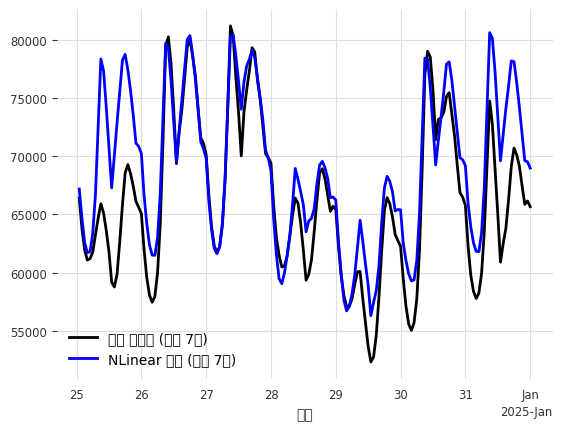

In [ ]:
input_series.plot(label="ÏûÖÎ†• Îç∞Ïù¥ÌÑ∞ (ÏµúÍ∑º 7Ïùº)", color='black')
forecast_n.plot(label="NLinear ÏòàÏ∏° (Îã§Ïùå 7Ïùº)", color='blue')


Í≤ÄÏ†ïÏÑ† : Ïã§Ï†ú Îç∞Ïù¥ÌÑ∞
ÌååÎûÄÏÑ† : Îã§Ïùå 7Ïùº ÏòàÏ∏°Ìïú Îç∞Ïù¥ÌÑ∞

In [ ]:
# ÏµúÍ∑º 7ÏùºÎßå Îî∞Î°ú ÏûòÎùºÏÑú
history = series_scaled[-168:]

# Ïù¥ Íµ¨Í∞ÑÏùÑ Í∏∞Ï§ÄÏúºÎ°ú ÏòàÏ∏° ÏãúÏûë
forecast_n = n_model.predict(n=168, series=history)
forecast_n = scaler.inverse_transform(forecast_n)


INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs


Predicting: |          | 0/? [00:00<?, ?it/s]

In [ ]:
input_series = scaler.inverse_transform(history)

input_series.plot(label="ÏûÖÎ†• Îç∞Ïù¥ÌÑ∞ (ÏµúÍ∑º 7Ïùº)", lw=2, color="black")
forecast_n.plot(label="NLinear ÏòàÏ∏° (Îã§Ïùå 7Ïùº)", lw=2, color="blue")

import matplotlib.dates as mdates
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.xticks(rotation=45)
plt.grid(True)
plt.legend()
plt.show()


NameError: name 'scaler' is not defined

In [ ]:
#DLinear Î™®Îç∏ ÏòàÏ∏° ÏΩîÎìú
from darts.models import DLinearModel

# DLinear Î™®Îç∏ Ï†ïÏùò (ÏûÖÎ†• 7Ïùº ‚Üí ÏòàÏ∏° 7Ïùº)
d_model = DLinearModel(input_chunk_length=168, output_chunk_length=168)

# ÌïôÏäµ (ÏµúÍ∑º 7Ïùº Ï†úÏô∏Ìïú Ï†ÑÏ≤¥Î°ú ÌïôÏäµ)
d_model.fit(series_scaled[:-168])

# ÏòàÏ∏° (ÏûÖÎ†• ÏãúÏ†ê Î™ÖÏãú)
forecast_d = d_model.predict(168, series=series_scaled[-168:])
forecast_d = scaler.inverse_transform(forecast_d)


INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.callbacks.model_summary:
  | Name            | Type             | Params | Mode 
-------------------------------------------------------------
0 | criterion       | MSELoss          | 0      | train
1 | train_criterion | MSELoss          | 0      | train
2 | val_criterion   | MSELoss          | 0      | train
3 | train_metrics   | MetricCollection | 0      | train
4 | val_metrics     | MetricCollection | 0      | train
5 | decomposition   | _SeriesDecomp    | 0      | train
6 | linear_seasonal | Linear           | 28.4 K | train
7 | linear_trend    | Linear           | 28.4 K | train
-------------------------------------------------------------
56.8 K    Trainable params
0         Non-trainable params
56.8 K    Total params
0.2

Training: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=100` reached.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs


Predicting: |          | 0/? [00:00<?, ?it/s]

In [ ]:
#ÏûÖÎ†•Îç∞Ïù¥ÌÑ∞ (ÏµúÍ∑º 7Ïùº) Î≥µÏõê
input_series = scaler.inverse_transform(series_scaled[-168:])


<ipython-input-23-ea4d12991242>:21: UserWarning: Glyph 51068 (\N{HANGUL SYLLABLE IL}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-23-ea4d12991242>:21: UserWarning: Glyph 49884 (\N{HANGUL SYLLABLE SI}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-23-ea4d12991242>:21: UserWarning: Glyph 51077 (\N{HANGUL SYLLABLE IB}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-23-ea4d12991242>:21: UserWarning: Glyph 47141 (\N{HANGUL SYLLABLE RYEOG}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-23-ea4d12991242>:21: UserWarning: Glyph 45936 (\N{HANGUL SYLLABLE DE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-23-ea4d12991242>:21: UserWarning: Glyph 51060 (\N{HANGUL SYLLABLE I}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-23-ea4d12991242>:21: UserWarning: Glyph 53552 (\N{HANGUL SYLLABLE TEO}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-i

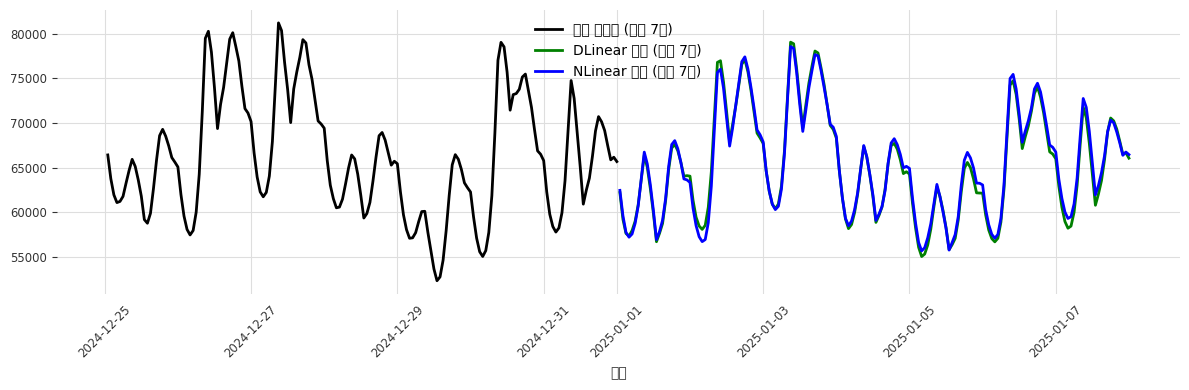

In [ ]:
#DLinear vs NLinear ÎπÑÍµê
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

plt.figure(figsize=(12, 4))

# ÏûÖÎ†• ÏãúÍ≥ÑÏó¥
input_series.plot(label="ÏûÖÎ†• Îç∞Ïù¥ÌÑ∞ (ÏµúÍ∑º 7Ïùº)", color="black")

# DLinear ÏòàÏ∏°
forecast_d.plot(label="DLinear ÏòàÏ∏° (Îã§Ïùå 7Ïùº)", color="green")

# NLinear ÏòàÏ∏° (ÏïûÏóêÏÑú ÎßåÎì† forecast_n ÏÇ¨Ïö©)
forecast_n.plot(label="NLinear ÏòàÏ∏° (Îã§Ïùå 7Ïùº)", color="blue")

# ÎÇ†Ïßú Ìè¨Îß∑ + Ïä§ÌÉÄÏùº
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [ ]:
# NLinear Î™®Îç∏ Ï†ÅÏö©
H = 24 * 90  # 90Ïùº = 3Í∞úÏõî = 2160ÏãúÍ∞Ñ

# ÏµúÍ∑º 90Ïùº(2160ÏãúÍ∞Ñ) Ï§ë ÏùºÎ∂Ä Íµ¨Í∞ÑÏùÑ historyÎ°ú ÏÑ§Ï†ï (Ïòà: ÎßàÏßÄÎßâ 1Í∞úÏõîÎßå Ïç®ÎèÑ OK)
history = series_scaled[-2160:]

# ÏòàÏ∏°
forecast_n = n_model.predict(H, series=history)
forecast_n = scaler.inverse_transform(forecast_n)

# ÏûÖÎ†• Î≥µÏõê
input_series = scaler.inverse_transform(history)


INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs


Predicting: |          | 0/? [00:00<?, ?it/s]

<ipython-input-25-2df40df05758>:8: UserWarning: Glyph 51068 (\N{HANGUL SYLLABLE IL}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-25-2df40df05758>:8: UserWarning: Glyph 49884 (\N{HANGUL SYLLABLE SI}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-25-2df40df05758>:8: UserWarning: Glyph 51077 (\N{HANGUL SYLLABLE IB}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-25-2df40df05758>:8: UserWarning: Glyph 47141 (\N{HANGUL SYLLABLE RYEOG}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-25-2df40df05758>:8: UserWarning: Glyph 52572 (\N{HANGUL SYLLABLE COE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-25-2df40df05758>:8: UserWarning: Glyph 44540 (\N{HANGUL SYLLABLE GEUN}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-25-2df40df05758>:8: UserWarning: Glyph 44060 (\N{HANGUL SYLLABLE GAE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-inpu

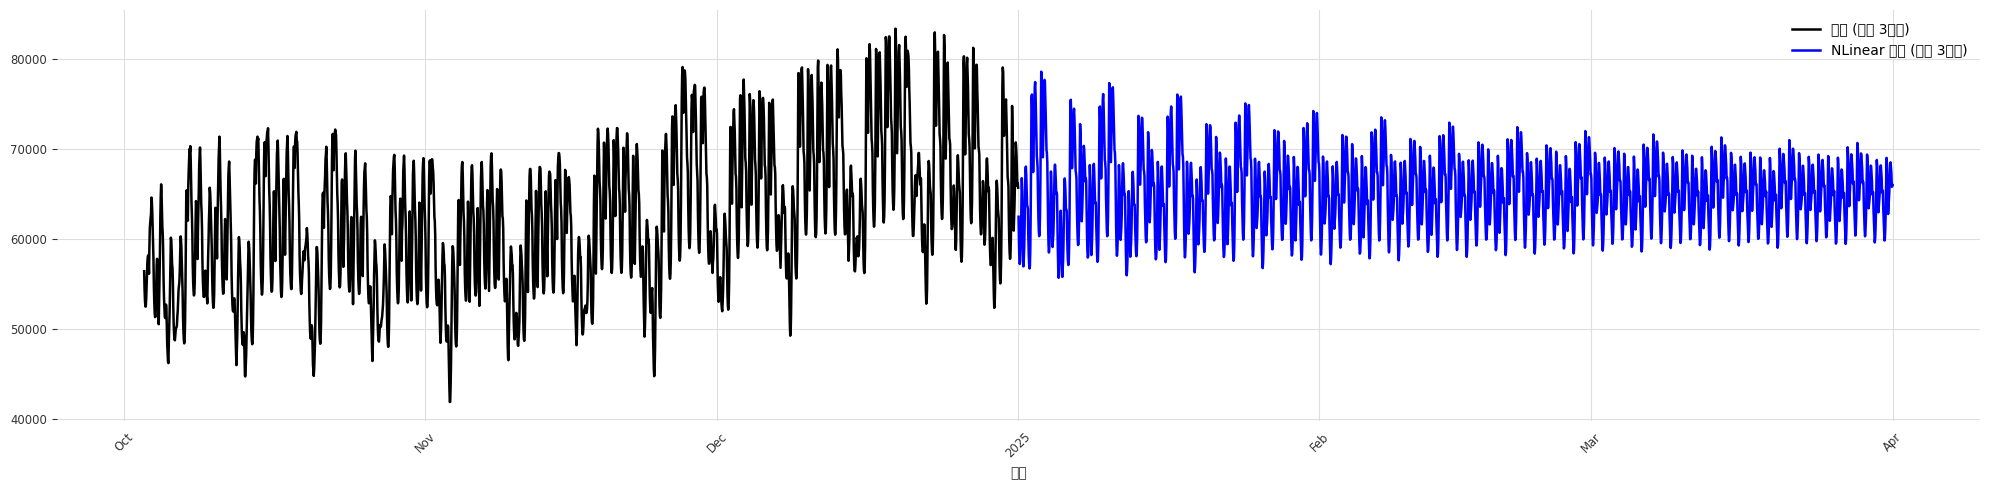

In [ ]:
#Í≥ÑÏ†à Îã®ÏúÑ ÏòàÏ∏° ÏãúÍ∞ÅÌôî
plt.figure(figsize=(20, 5))
input_series.plot(label="ÏûÖÎ†• (ÏµúÍ∑º 3Í∞úÏõî)", lw=1.8, color='black')
forecast_n.plot(label="NLinear ÏòàÏ∏° (Îã§Ïùå 3Í∞úÏõî)", lw=1.8, color='blue')
plt.xticks(rotation=45)
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


In [ ]:
from darts.models import DLinearModel

H = 24 * 90  # 90Ïùº = 2160ÏãúÍ∞Ñ

# ÏµúÍ∑º 90Ïùº Îç∞Ïù¥ÌÑ∞ (NLinearÏôÄ ÎèôÏùº)
history = series_scaled[-2160:]

# DLinear Î™®Îç∏ Ï†ïÏùò
d_model = DLinearModel(input_chunk_length=2160, output_chunk_length=2160)

# ÌïôÏäµ (ÏòàÏ∏°Ïö© Íµ¨Í∞Ñ Ï†úÏô∏)
d_model.fit(series_scaled[:-2160])

# ÏòàÏ∏°
forecast_d = d_model.predict(n=2160, series=history)
forecast_d = scaler.inverse_transform(forecast_d)

# ÏûÖÎ†• Îç∞Ïù¥ÌÑ∞ Î≥µÏõê
input_series = scaler.inverse_transform(history)


INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.callbacks.model_summary:
  | Name            | Type             | Params | Mode 
-------------------------------------------------------------
0 | criterion       | MSELoss          | 0      | train
1 | train_criterion | MSELoss          | 0      | train
2 | val_criterion   | MSELoss          | 0      | train
3 | train_metrics   | MetricCollection | 0      | train
4 | val_metrics     | MetricCollection | 0      | train
5 | decomposition   | _SeriesDecomp    | 0      | train
6 | linear_seasonal | Linear           | 4.7 M  | train
7 | linear_trend    | Linear           | 4.7 M  | train
-------------------------------------------------------------
9.3 M     Trainable params
0         Non-trainable params
9.3 M     Total params
37.

Training: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=100` reached.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs


Predicting: |          | 0/? [00:00<?, ?it/s]

<ipython-input-27-012ca4c4beef>:10: UserWarning: Glyph 51068 (\N{HANGUL SYLLABLE IL}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-27-012ca4c4beef>:10: UserWarning: Glyph 49884 (\N{HANGUL SYLLABLE SI}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-27-012ca4c4beef>:10: UserWarning: Glyph 47784 (\N{HANGUL SYLLABLE MO}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-27-012ca4c4beef>:10: UserWarning: Glyph 45944 (\N{HANGUL SYLLABLE DEL}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-27-012ca4c4beef>:10: UserWarning: Glyph 50696 (\N{HANGUL SYLLABLE YE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-27-012ca4c4beef>:10: UserWarning: Glyph 52769 (\N{HANGUL SYLLABLE CEUG}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-27-012ca4c4beef>:10: UserWarning: Glyph 51077 (\N{HANGUL SYLLABLE IB}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-i

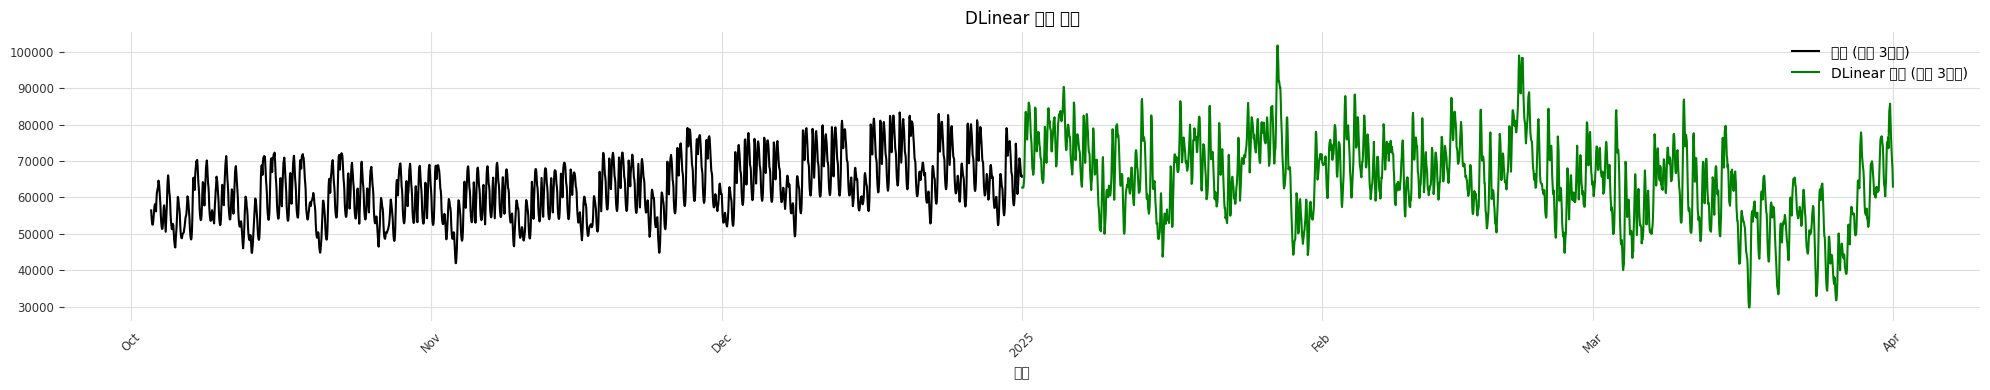

In [ ]:
#DLinear Î™®Îç∏ ÏãúÍ∞ÅÌôî
plt.figure(figsize=(20, 4))
input_series.plot(label="ÏûÖÎ†• (ÏµúÍ∑º 3Í∞úÏõî)", lw=1.5, color="black")
forecast_d.plot(label="DLinear ÏòàÏ∏° (Îã§Ïùå 3Í∞úÏõî)", lw=1.5, color="green")

plt.title("DLinear Î™®Îç∏ ÏòàÏ∏°")
plt.xticks(rotation=45)
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


<ipython-input-28-a74ccfa6fa91>:10: UserWarning: Glyph 51068 (\N{HANGUL SYLLABLE IL}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-28-a74ccfa6fa91>:10: UserWarning: Glyph 49884 (\N{HANGUL SYLLABLE SI}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-28-a74ccfa6fa91>:10: UserWarning: Glyph 47784 (\N{HANGUL SYLLABLE MO}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-28-a74ccfa6fa91>:10: UserWarning: Glyph 45944 (\N{HANGUL SYLLABLE DEL}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-28-a74ccfa6fa91>:10: UserWarning: Glyph 50696 (\N{HANGUL SYLLABLE YE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-28-a74ccfa6fa91>:10: UserWarning: Glyph 52769 (\N{HANGUL SYLLABLE CEUG}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-28-a74ccfa6fa91>:10: UserWarning: Glyph 51077 (\N{HANGUL SYLLABLE IB}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-i

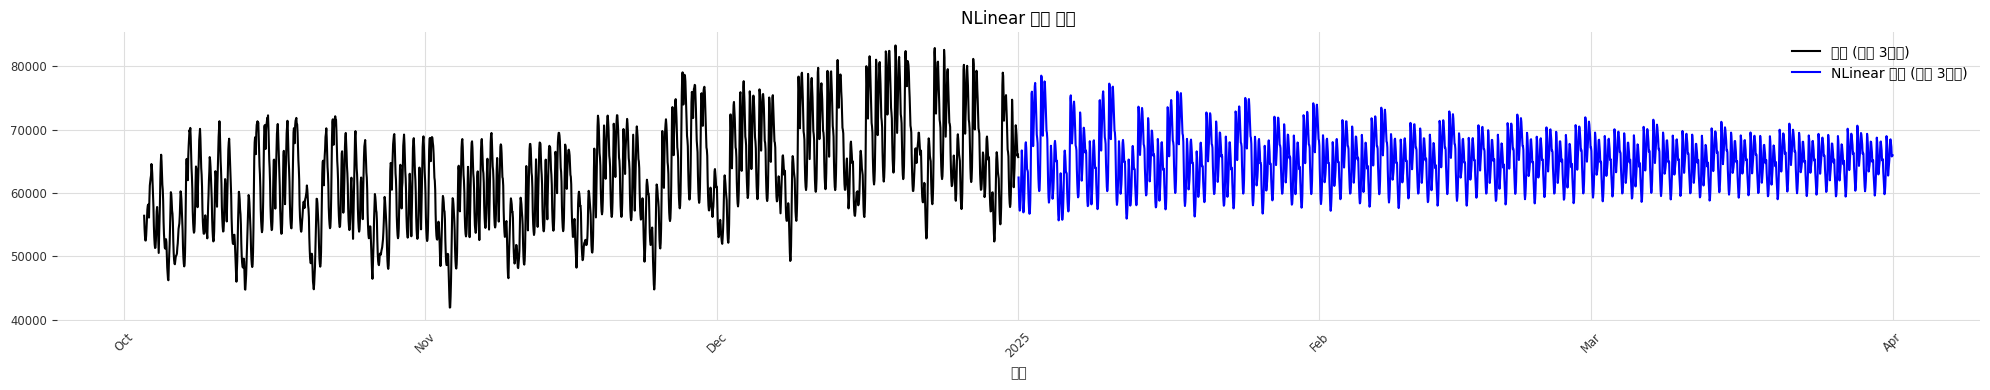

In [ ]:
#NLinear Î™®Îç∏ ÏãúÍ∞ÅÌôî
plt.figure(figsize=(20, 4))
input_series.plot(label="ÏûÖÎ†• (ÏµúÍ∑º 3Í∞úÏõî)", lw=1.5, color="black")
forecast_n.plot(label="NLinear ÏòàÏ∏° (Îã§Ïùå 3Í∞úÏõî)", lw=1.5, color="blue")

plt.title("NLinear Î™®Îç∏ ÏòàÏ∏°")
plt.xticks(rotation=45)
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


<ipython-input-29-1a5c43acb358>:19: UserWarning: Glyph 51068 (\N{HANGUL SYLLABLE IL}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-29-1a5c43acb358>:19: UserWarning: Glyph 49884 (\N{HANGUL SYLLABLE SI}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-29-1a5c43acb358>:19: UserWarning: Glyph 50696 (\N{HANGUL SYLLABLE YE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-29-1a5c43acb358>:19: UserWarning: Glyph 52769 (\N{HANGUL SYLLABLE CEUG}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-29-1a5c43acb358>:19: UserWarning: Glyph 44208 (\N{HANGUL SYLLABLE GYEOL}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-29-1a5c43acb358>:19: UserWarning: Glyph 44284 (\N{HANGUL SYLLABLE GWA}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-29-1a5c43acb358>:19: UserWarning: Glyph 51077 (\N{HANGUL SYLLABLE IB}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipytho

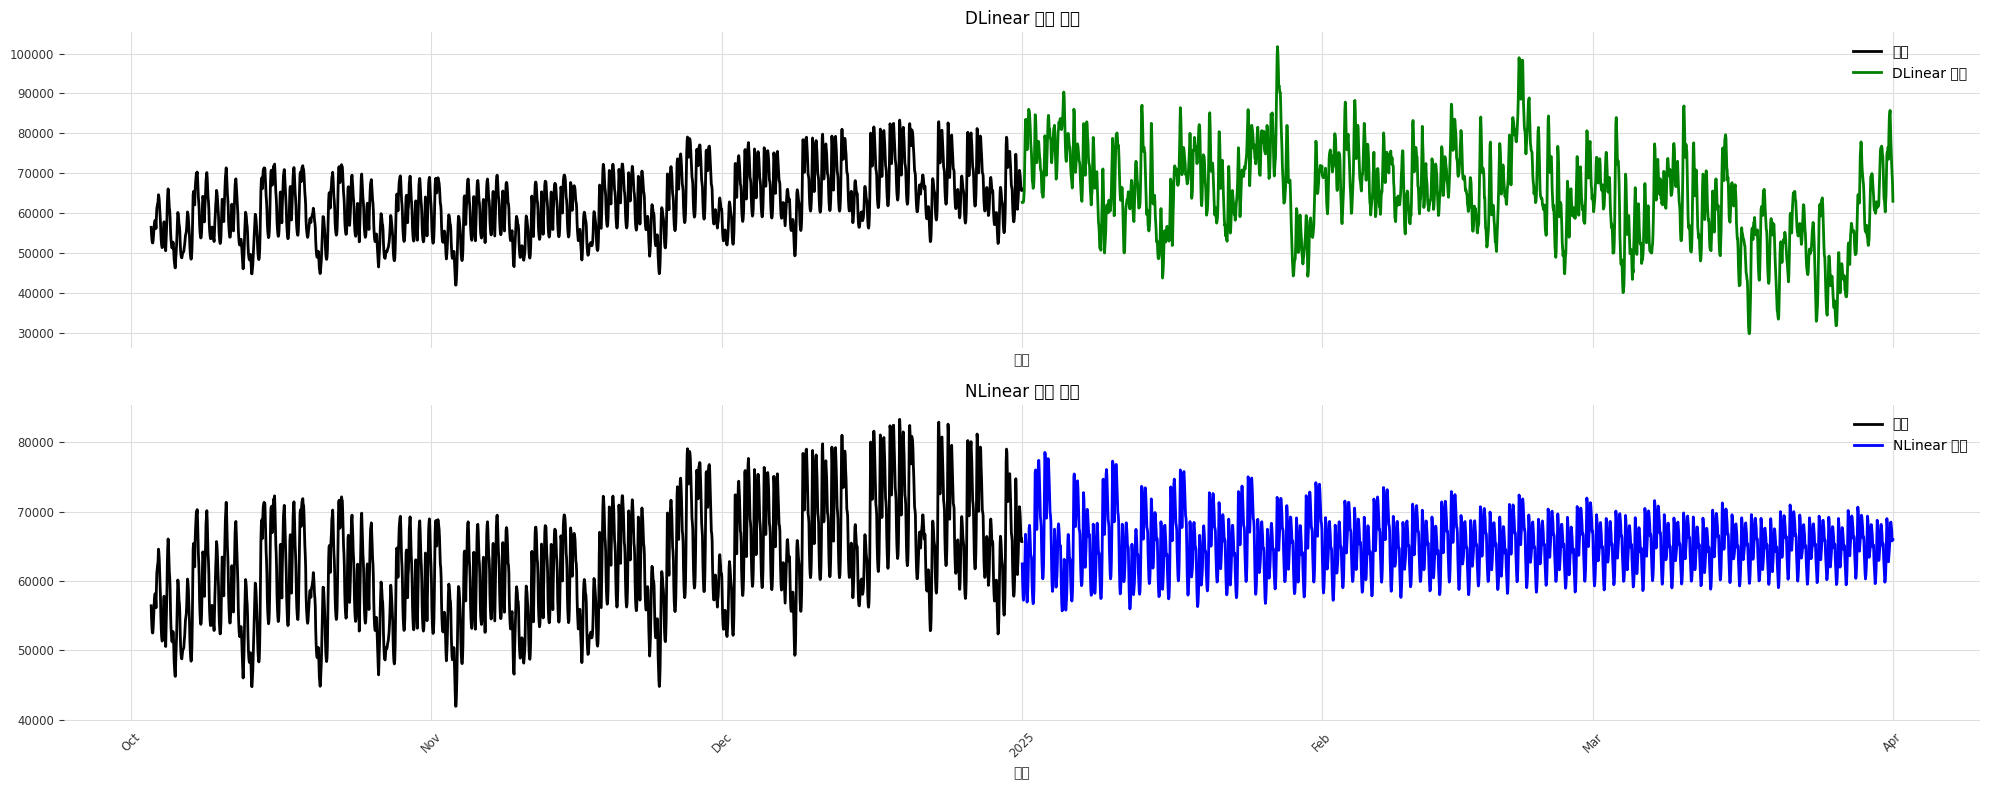

In [ ]:
#DLinear NLinear Ìïú Î∞ïÏä§Ïóê ÎπÑÍµê
fig, axes = plt.subplots(2, 1, figsize=(20, 8), sharex=True)

# DLinear
input_series.plot(ax=axes[0], label="ÏûÖÎ†•", color='black')
forecast_d.plot(ax=axes[0], label="DLinear ÏòàÏ∏°", color='green')
axes[0].set_title("DLinear ÏòàÏ∏° Í≤∞Í≥º")
axes[0].legend()
axes[0].grid(True)

# NLinear
input_series.plot(ax=axes[1], label="ÏûÖÎ†•", color='black')
forecast_n.plot(ax=axes[1], label="NLinear ÏòàÏ∏°", color='blue')
axes[1].set_title("NLinear ÏòàÏ∏° Í≤∞Í≥º")
axes[1].legend()
axes[1].grid(True)

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


<ipython-input-30-f20cd32bf328>:16: UserWarning: Glyph 51068 (\N{HANGUL SYLLABLE IL}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-30-f20cd32bf328>:16: UserWarning: Glyph 49884 (\N{HANGUL SYLLABLE SI}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-30-f20cd32bf328>:16: UserWarning: Glyph 51077 (\N{HANGUL SYLLABLE IB}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-30-f20cd32bf328>:16: UserWarning: Glyph 47141 (\N{HANGUL SYLLABLE RYEOG}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-30-f20cd32bf328>:16: UserWarning: Glyph 52572 (\N{HANGUL SYLLABLE COE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-30-f20cd32bf328>:16: UserWarning: Glyph 44540 (\N{HANGUL SYLLABLE GEUN}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-30-f20cd32bf328>:16: UserWarning: Glyph 44060 (\N{HANGUL SYLLABLE GAE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipyth

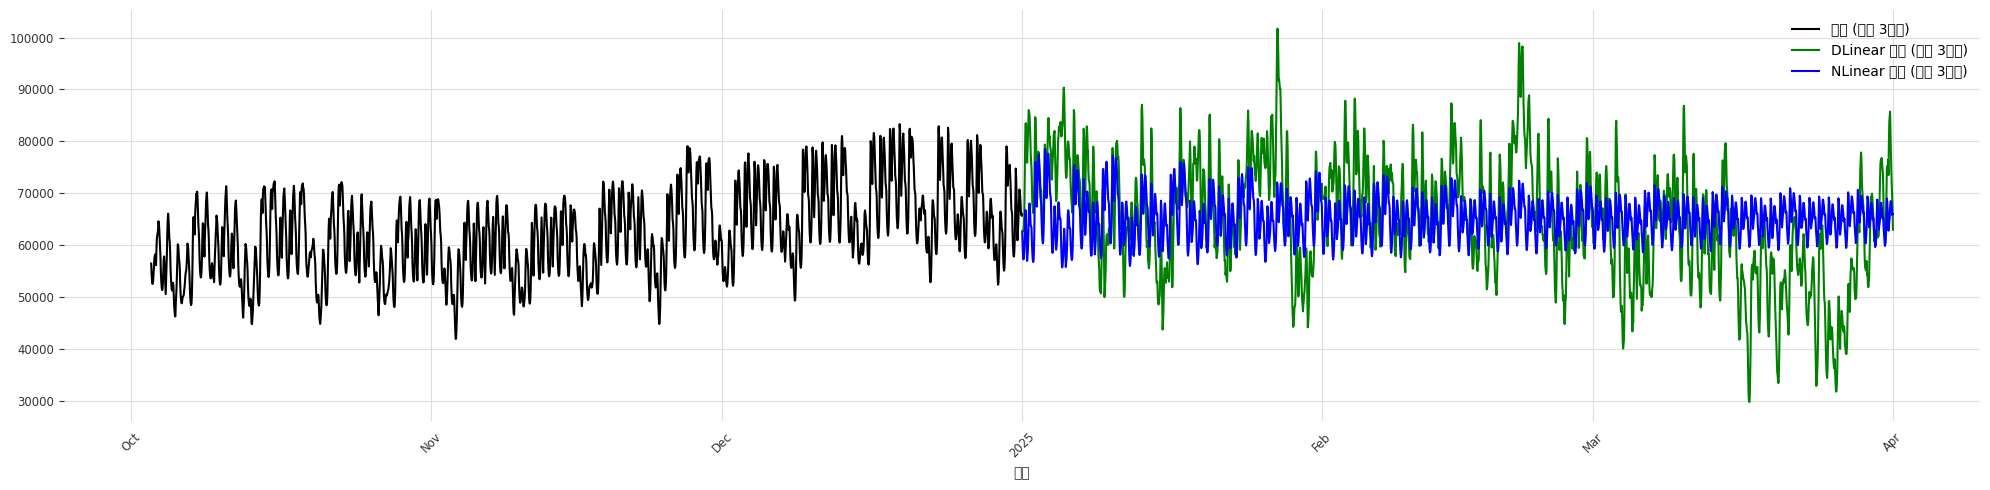

In [ ]:
#DLinear vs NLinear Î™®Îç∏ ÎπÑÍµê
plt.figure(figsize=(20, 5))

# ÏûÖÎ†• ÏãúÍ≥ÑÏó¥
input_series.plot(label="ÏûÖÎ†• (ÏµúÍ∑º 3Í∞úÏõî)", lw=1.5, color='black')

# DLinear ÏòàÏ∏°
forecast_d.plot(label="DLinear ÏòàÏ∏° (Îã§Ïùå 3Í∞úÏõî)", lw=1.5, color='green')

# NLinear ÏòàÏ∏° (Ïù¥Ï†Ñ forecast_n Í∑∏ÎåÄÎ°ú ÏÇ¨Ïö©)
forecast_n.plot(label="NLinear ÏòàÏ∏° (Îã§Ïùå 3Í∞úÏõî)", lw=1.5, color='blue')

plt.xticks(rotation=45)
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


In [ ]:
import numpy as np

forecast_d = forecast_d.map(lambda x: np.clip(x, 40000, 90000))


In [ ]:
d_model = DLinearModel(input_chunk_length=720, output_chunk_length=2160)  # 30Ïùº ‚Üí 90Ïùº ÏòàÏ∏°


In [ ]:
forecast_d = forecast_d * 0.85  # Ï†ÑÏ≤¥ ÏòàÏ∏°Í∞í 15% Í∞êÏÜå


In [ ]:
#DLinear ÏïàÏ†ïÌôî
import pandas as pd
from darts import TimeSeries

# 1. TimeSeries ‚Üí pandas DataFrame ÏàòÎèô Î≥ÄÌôò
df = pd.DataFrame({
    "value": forecast_d.values().flatten(),
}, index=forecast_d.time_index)

# 2. Ïù¥ÎèôÌèâÍ∑† Ïä§Î¨¥Îî©
smoothed = df.rolling(window=24, min_periods=1).mean()

# 3. Îã§Ïãú TimeSeriesÎ°ú Î≥ÄÌôò
forecast_d_smooth = TimeSeries.from_dataframe(smoothed)


<ipython-input-35-a67978337b05>:9: UserWarning: Glyph 51068 (\N{HANGUL SYLLABLE IL}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-35-a67978337b05>:9: UserWarning: Glyph 49884 (\N{HANGUL SYLLABLE SI}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-35-a67978337b05>:9: UserWarning: Glyph 50696 (\N{HANGUL SYLLABLE YE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-35-a67978337b05>:9: UserWarning: Glyph 52769 (\N{HANGUL SYLLABLE CEUG}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-35-a67978337b05>:9: UserWarning: Glyph 49828 (\N{HANGUL SYLLABLE SEU}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-35-a67978337b05>:9: UserWarning: Glyph 47924 (\N{HANGUL SYLLABLE MU}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-35-a67978337b05>:9: UserWarning: Glyph 46377 (\N{HANGUL SYLLABLE DING}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-

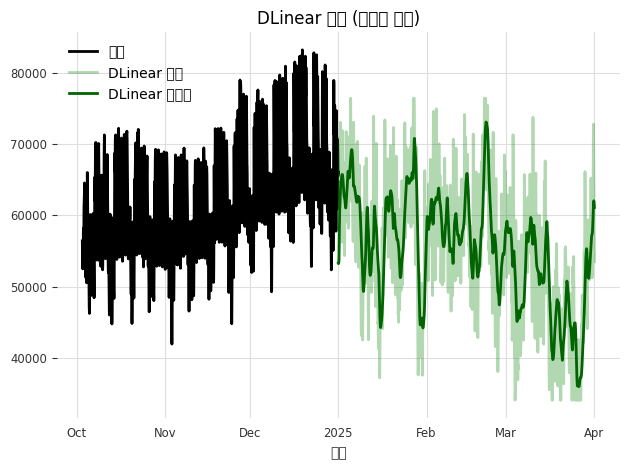

In [ ]:
#DLinear ÏïàÏ†ïÌôî ÏãúÍ∞ÅÌôî
input_series.plot(label="ÏûÖÎ†•", color='black')
forecast_d.plot(label="DLinear ÏõêÎ≥∏", color='green', alpha=0.3)
forecast_d_smooth.plot(label="DLinear Ïä§Î¨¥Îî©", color='darkgreen', lw=2)

plt.title("DLinear ÏòàÏ∏° (Ïä§Î¨¥Îî© Ï†ÅÏö©)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


<ipython-input-36-193640da58ff>:22: UserWarning: Glyph 51068 (\N{HANGUL SYLLABLE IL}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-36-193640da58ff>:22: UserWarning: Glyph 49884 (\N{HANGUL SYLLABLE SI}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-36-193640da58ff>:22: UserWarning: Glyph 50696 (\N{HANGUL SYLLABLE YE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-36-193640da58ff>:22: UserWarning: Glyph 52769 (\N{HANGUL SYLLABLE CEUG}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-36-193640da58ff>:22: UserWarning: Glyph 49828 (\N{HANGUL SYLLABLE SEU}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-36-193640da58ff>:22: UserWarning: Glyph 47924 (\N{HANGUL SYLLABLE MU}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-36-193640da58ff>:22: UserWarning: Glyph 46377 (\N{HANGUL SYLLABLE DING}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython

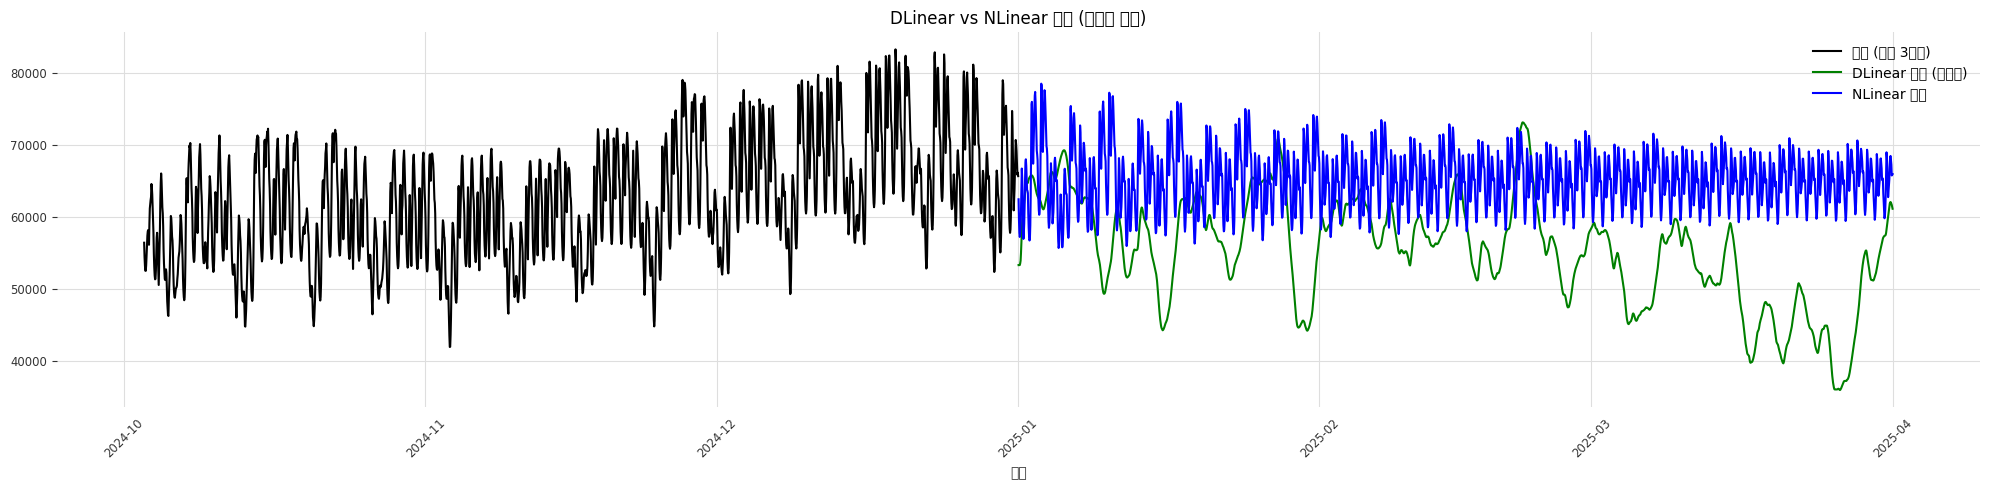

In [ ]:
#ÏàòÏ†ïÌïú DLinear ÏôÄ NLinearÎπÑÍµê
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

plt.figure(figsize=(20, 5))

# ÏûÖÎ†• ÏãúÍ≥ÑÏó¥
input_series.plot(label="ÏûÖÎ†• (ÏµúÍ∑º 3Í∞úÏõî)", lw=1.5, color='black')

# Ïä§Î¨¥Îî©Îêú DLinear ÏòàÏ∏°
forecast_d_smooth.plot(label="DLinear ÏòàÏ∏° (Ïä§Î¨¥Îî©)", lw=1.5, color='green')

# Í∏∞Ï°¥ NLinear ÏòàÏ∏°
forecast_n.plot(label="NLinear ÏòàÏ∏°", lw=1.5, color='blue')

# ÏãúÍ∞Å ÏÑ§Ï†ï
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
plt.xticks(rotation=45)
plt.title("DLinear vs NLinear ÏòàÏ∏° (Ïä§Î¨¥Îî© Ï†ÅÏö©)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [ ]:
# ÏòàÏ∏° Îç∞Ïù¥ÌÑ∞ Î∂ÑÍ∏∞Î≥ÑÎ°ú ÎÇòÎàÑÍ∏∞
# 1. pandas DataFrameÏúºÎ°ú Î≥ÄÌôò
df = pd.DataFrame({
    "value": forecast_d_smooth.values().flatten(),
}, index=forecast_d_smooth.time_index)

# 2. Î∂ÑÍ∏∞ Ï†ïÎ≥¥ Ï∂îÍ∞Ä
df["quarter"] = df.index.to_period("Q")

# 3. Î∂ÑÍ∏∞Î≥Ñ ÌèâÍ∑†Í∞í Íµ¨ÌïòÍ∏∞
quarterly_avg = df.groupby("quarter")["value"].mean()

print(quarterly_avg)


quarter
2025Q1    55334.024949
2025Q2    61135.653158
Freq: Q-DEC, Name: value, dtype: float64


/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 49688 (\N{HANGUL SYLLABLE SU}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 50836 (\N{HANGUL SYLLABLE YO}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 47049 (\N{HANGUL SYLLABLE RYANG}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 48516 (\N{HANGUL SYLLABLE BUN}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 44592 (\N{HANGUL SYLLABLE GI}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/l

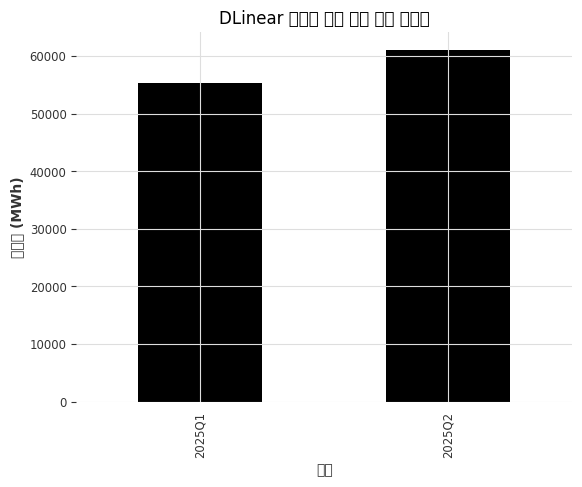

In [ ]:
quarterly_avg.plot(kind='bar', title="DLinear Î∂ÑÍ∏∞Î≥Ñ ÏòàÏ∏° ÌèâÍ∑† Ï†ÑÎ†• ÏàòÏöîÎüâ")
plt.ylabel("ÏàòÏöîÎüâ (MWh)")
plt.xlabel("Î∂ÑÍ∏∞")
plt.grid(True)
plt.show()


In [ ]:
'/content/ÌïúÍµ≠Ï†ÑÎ†•Í±∞ÎûòÏÜå_ÏãúÍ∞ÑÎ≥Ñ Ï†ÑÍµ≠ Ï†ÑÎ†•ÏàòÏöîÎüâ_20241231.csv'


'/content/ÌïúÍµ≠Ï†ÑÎ†•Í±∞ÎûòÏÜå_ÏãúÍ∞ÑÎ≥Ñ Ï†ÑÍµ≠ Ï†ÑÎ†•ÏàòÏöîÎüâ_20241231.csv'

In [ ]:
!pip install u8darts[all] --quiet

import pandas as pd
import numpy as np
from darts import TimeSeries
from darts.models import DLinearModel
from darts.dataprocessing.transformers import Scaler
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# 1. Îç∞Ïù¥ÌÑ∞ Î°úÎî© Î∞è Ï†ïÎ¶¨
df = pd.read_csv("/content/drive/MyDrive/ColabNotebooks/ÌïúÍµ≠Ï†ÑÎ†•Í±∞ÎûòÏÜå_ÏãúÍ∞ÑÎ≥Ñ Ï†ÑÍµ≠ Ï†ÑÎ†•ÏàòÏöîÎüâ_20241231.csv", encoding='cp949')
df_long = df.melt(id_vars='ÎÇ†Ïßú', var_name='ÏãúÍ∞Ñ', value_name='ÏàòÏöîÎüâ')
df_long['ÏãúÍ∞Ñ'] = df_long['ÏãúÍ∞Ñ'].str.replace('Ïãú', '').astype(int)
df_long['ÏùºÏãú'] = pd.to_datetime(df_long['ÎÇ†Ïßú']) + pd.to_timedelta(df_long['ÏãúÍ∞Ñ'] - 1, unit='h')
df_long = df_long[['ÏùºÏãú', 'ÏàòÏöîÎüâ']].sort_values('ÏùºÏãú')

# 2. TimeSeries Î≥ÄÌôò Î∞è Ïä§ÏºÄÏùºÎßÅ
series = TimeSeries.from_dataframe(df_long, time_col='ÏùºÏãú', value_cols='ÏàòÏöîÎüâ')
scaler = Scaler(StandardScaler())
series_scaled = scaler.fit_transform(series)

# 3. DLinear ÏòàÏ∏°
input_chunk = 2160
output_chunk = 2160
history = series_scaled[-input_chunk:]

model = DLinearModel(input_chunk_length=input_chunk, output_chunk_length=output_chunk)
model.fit(series_scaled[:-input_chunk])
forecast_d = model.predict(n=output_chunk, series=history)

# 4. Ïä§Î¨¥Îî© Ï≤òÎ¶¨
df_forecast = pd.DataFrame({"value": forecast_d.values().flatten()}, index=forecast_d.time_index)
df_forecast["smoothed"] = df_forecast["value"].rolling(window=6, min_periods=1).mean()
forecast_d_smooth = TimeSeries.from_dataframe(df_forecast[["smoothed"]])

# 5. ÏûÖÎ†• ÏãúÍ≥ÑÏó¥ Î≥µÏõê
input_series = scaler.inverse_transform(history)

# 6. Î∂ÑÍ∏∞Î≥Ñ ÌèâÍ∑† ÎπÑÍµê
df_input = pd.DataFrame({"value": input_series.values().flatten()}, index=input_series.time_index)
df_forecast = pd.DataFrame({"value": forecast_d_smooth.values().flatten()}, index=forecast_d_smooth.time_index)
df_input["quarter"] = df_input.index.to_period("Q")
df_forecast["quarter"] = df_forecast.index.to_period("Q")

q_avg_input = df_input.groupby("quarter")["value"].mean()
q_avg_forecast = df_forecast.groupby("quarter")["value"].mean()

df_compare = pd.DataFrame({
    "2024 Ïã§Ï†úÍ∞í": q_avg_input,
    "2025 ÏòàÏ∏°Í∞í (DLinear)": q_avg_forecast
}).sort_index()

# Í≤∞Í≥º Ï∂úÎ†•
print(df_compare)


INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.callbacks.model_summary:
  | Name            | Type             | Params | Mode 
-------------------------------------------------------------
0 | criterion       | MSELoss          | 0      | train
1 | train_criterion | MSELoss          | 0      | train
2 | val_criterion   | MSELoss          | 0      | train
3 | train_metrics   | MetricCollection | 0      | train
4 | val_metrics     | MetricCollection | 0      | train
5 | decomposition   | _SeriesDecomp    | 0      | train
6 | linear_seasonal | Linear           | 4.7 M  | train
7 | linear_trend    | Linear           | 4.7 M  | train
-------------------------------------------------------------
9.3 M     Trainable params
0         Non-trainable params
9.3 M     Total params
37.

Training: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=100` reached.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs


Predicting: |          | 0/? [00:00<?, ?it/s]

             2024 Ïã§Ï†úÍ∞í  2025 ÏòàÏ∏°Í∞í (DLinear)
quarter                                  
2024Q4   62451.455556                 NaN
2025Q1            NaN            0.034864


In [ ]:
# Î∂ÑÍ∏∞Î≥Ñ ÌèâÍ∑† ÎπÑÍµê Í≤∞Í≥ºÎ•º Î≥¥Í∏∞ Ï¢ãÍ≤å Ï†ïÎ¶¨
from IPython.display import display

df_compare = pd.DataFrame({
    "2024 Ïã§Ï†úÍ∞í": q_avg_input,
    "2025 ÏòàÏ∏°Í∞í (DLinear)": q_avg_forecast
}).sort_index()

df_compare.index.name = "Î∂ÑÍ∏∞"
display(df_compare)


2024 Ïã§Ï†úÍ∞í  2025 ÏòàÏ∏°Í∞í (DLinear)
Î∂ÑÍ∏∞                                      
2024Q4  62451.455556                 NaN
2025Q1           NaN            0.034864

In [ ]:
# Ìå®ÌÇ§ÏßÄ ÏûÑÌè¨Ìä∏
import pandas as pd
import numpy as np
from darts import TimeSeries
from darts.models import DLinearModel
from darts.dataprocessing.transformers import Scaler
from sklearn.preprocessing import StandardScaler
from IPython.display import display

# 1. Îç∞Ïù¥ÌÑ∞ Î∂àÎü¨Ïò§Í∏∞ Î∞è Ï†ïÎ¶¨
df = pd.read_csv("/content/drive/MyDrive/ColabNotebooks/ÌïúÍµ≠Ï†ÑÎ†•Í±∞ÎûòÏÜå_ÏãúÍ∞ÑÎ≥Ñ Ï†ÑÍµ≠ Ï†ÑÎ†•ÏàòÏöîÎüâ_20241231.csv", encoding='cp949')
df_long = df.melt(id_vars='ÎÇ†Ïßú', var_name='ÏãúÍ∞Ñ', value_name='ÏàòÏöîÎüâ')
df_long['ÏãúÍ∞Ñ'] = df_long['ÏãúÍ∞Ñ'].str.replace('Ïãú', '').astype(int)
df_long['ÏùºÏãú'] = pd.to_datetime(df_long['ÎÇ†Ïßú']) + pd.to_timedelta(df_long['ÏãúÍ∞Ñ'] - 1, unit='h')
df_long = df_long[['ÏùºÏãú', 'ÏàòÏöîÎüâ']].sort_values('ÏùºÏãú')

# 2. TimeSeries Î≥ÄÌôò
series = TimeSeries.from_dataframe(df_long, time_col='ÏùºÏãú', value_cols='ÏàòÏöîÎüâ')

# 3. Ïä§ÏºÄÏùºÎßÅ
scaler = Scaler(StandardScaler())
series_scaled = scaler.fit_transform(series)

# 4. Î™®Îç∏ ÌõàÎ†® Î∞è ÏòàÏ∏°
input_chunk = 2160  # ÏµúÍ∑º 90Ïùº
output_chunk = 2160  # ÏòàÏ∏° 90Ïùº
history = series_scaled[-input_chunk:]

model = DLinearModel(input_chunk_length=input_chunk, output_chunk_length=output_chunk)
model.fit(series_scaled[:-input_chunk])
forecast_d = model.predict(n=output_chunk, series=history)

# 5. Ïä§Î¨¥Îî© ÌõÑ Ïó≠Ïä§ÏºÄÏùºÎßÅ
df_forecast = pd.DataFrame({
    "value": forecast_d.values().flatten(),
}, index=forecast_d.time_index)

df_forecast["smoothed"] = df_forecast["value"].rolling(window=6, min_periods=1).mean()
forecast_d_smooth = TimeSeries.from_dataframe(df_forecast[["smoothed"]])

# üîÅ Ïó≠Ïä§ÏºÄÏùºÎßÅ Ï†ÅÏö©
forecast_d_smooth_unscaled = scaler.inverse_transform(forecast_d_smooth)

# 6. ÏûÖÎ†• Îç∞Ïù¥ÌÑ∞ Ïó≠Ïä§ÏºÄÏùºÎßÅ
input_series = scaler.inverse_transform(history)

# 7. Î∂ÑÍ∏∞Î≥Ñ ÌèâÍ∑† Í≥ÑÏÇ∞
df_input = pd.DataFrame({
    "value": input_series.values().flatten(),
}, index=input_series.time_index)
df_forecast = pd.DataFrame({
    "value": forecast_d_smooth_unscaled.values().flatten(),
}, index=forecast_d_smooth_unscaled.time_index)

df_input["quarter"] = df_input.index.to_period("Q")
df_forecast["quarter"] = df_forecast.index.to_period("Q")

q_avg_input = df_input.groupby("quarter")["value"].mean()
q_avg_forecast = df_forecast.groupby("quarter")["value"].mean()

# 8. ÎπÑÍµêÌëú ÏÉùÏÑ± Î∞è Ï∂úÎ†•
df_compare = pd.DataFrame({
    "2024 Ïã§Ï†úÍ∞í": q_avg_input,
    "2025 ÏòàÏ∏°Í∞í (DLinear)": q_avg_forecast
}).sort_index()

df_compare.index.name = "Î∂ÑÍ∏∞"
display(df_compare)


INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.callbacks.model_summary:
  | Name            | Type             | Params | Mode 
-------------------------------------------------------------
0 | criterion       | MSELoss          | 0      | train
1 | train_criterion | MSELoss          | 0      | train
2 | val_criterion   | MSELoss          | 0      | train
3 | train_metrics   | MetricCollection | 0      | train
4 | val_metrics     | MetricCollection | 0      | train
5 | decomposition   | _SeriesDecomp    | 0      | train
6 | linear_seasonal | Linear           | 4.7 M  | train
7 | linear_trend    | Linear           | 4.7 M  | train
-------------------------------------------------------------
9.3 M     Trainable params
0         Non-trainable params
9.3 M     Total params
37.

Training: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=100` reached.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs


Predicting: |          | 0/? [00:00<?, ?it/s]

2024 Ïã§Ï†úÍ∞í  2025 ÏòàÏ∏°Í∞í (DLinear)
Î∂ÑÍ∏∞                                      
2024Q4  62451.455556                 NaN
2025Q1           NaN        65093.108844

In [ ]:
print(df.columns)


Index(['ÎÇ†Ïßú', '1Ïãú', '2Ïãú', '3Ïãú', '4Ïãú', '5Ïãú', '6Ïãú', '7Ïãú', '8Ïãú', '9Ïãú', '10Ïãú',
       '11Ïãú', '12Ïãú', '13Ïãú', '14Ïãú', '15Ïãú', '16Ïãú', '17Ïãú', '18Ïãú', '19Ïãú', '20Ïãú',
       '21Ïãú', '22Ïãú', '23Ïãú', '24Ïãú'],
      dtype='object')


Ïó¨Í∏∞ÏÑú Î∂ÄÌÑ¥ ÎèÑÏòÅÎãòÏù¥ Ïã§ÌñâÌïú Î™®Îç∏Ïù¥Îûë ÎπÑÍµê

In [ ]:
# 1. ÎÇ†Ïßú + ÏãúÍ∞Ñ ‚Üí ÏÑ∏Î°úÌòï Î≥ÄÌôò
df_long = df.melt(id_vars='ÎÇ†Ïßú', var_name='ÏãúÍ∞Ñ', value_name='ÏàòÏöîÎüâ(MWh)')
df_long['ÏãúÍ∞Ñ'] = df_long['ÏãúÍ∞Ñ'].str.replace('Ïãú', '').astype(int)

# 2. ÎÇ†Ïßú + ÏãúÍ∞Ñ Ìï©Ï≥êÏÑú datetime ÏÉùÏÑ±
df_long['ÏùºÏãú'] = pd.to_datetime(df_long['ÎÇ†Ïßú']) + pd.to_timedelta(df_long['ÏãúÍ∞Ñ'] - 1, unit='h')

# 3. ProphetÏö© Ìè¨Îß∑ÏúºÎ°ú Î≥ÄÌôò
df_prophet = df_long[['ÏùºÏãú', 'ÏàòÏöîÎüâ(MWh)']].rename(columns={'ÏùºÏãú': 'ds', 'ÏàòÏöîÎüâ(MWh)': 'y'})


INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpk3o_9shg/iyoaepnv.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpk3o_9shg/gpkeuom4.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=8692', 'data', 'file=/tmp/tmpk3o_9shg/iyoaepnv.json', 'init=/tmp/tmpk3o_9shg/gpkeuom4.json', 'output', 'file=/tmp/tmpk3o_9shg/prophet_modelyix8lz9i/prophet_model-20250601174927.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
17:49:27 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
17:49:29 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
<ipython-input-26-d8996caa57d4>:54: UserWarning: Glyph 49884 (\N{HANGUL SYLLABLE SI}) missing from font(s) DejaVu Sans.
  plt.tight_layout()


‚úÖ Prophet ÏòàÏ∏° Í≤∞Í≥º ‚Üí MAE: 8925.82, RMSE: 9184.79


/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 49884 (\N{HANGUL SYLLABLE SI}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 44036 (\N{HANGUL SYLLABLE GAN}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 45800 (\N{HANGUL SYLLABLE DAN}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 50948 (\N{HANGUL SYLLABLE WI}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 51204 (\N{HANGUL SYLLABLE JEON}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/l

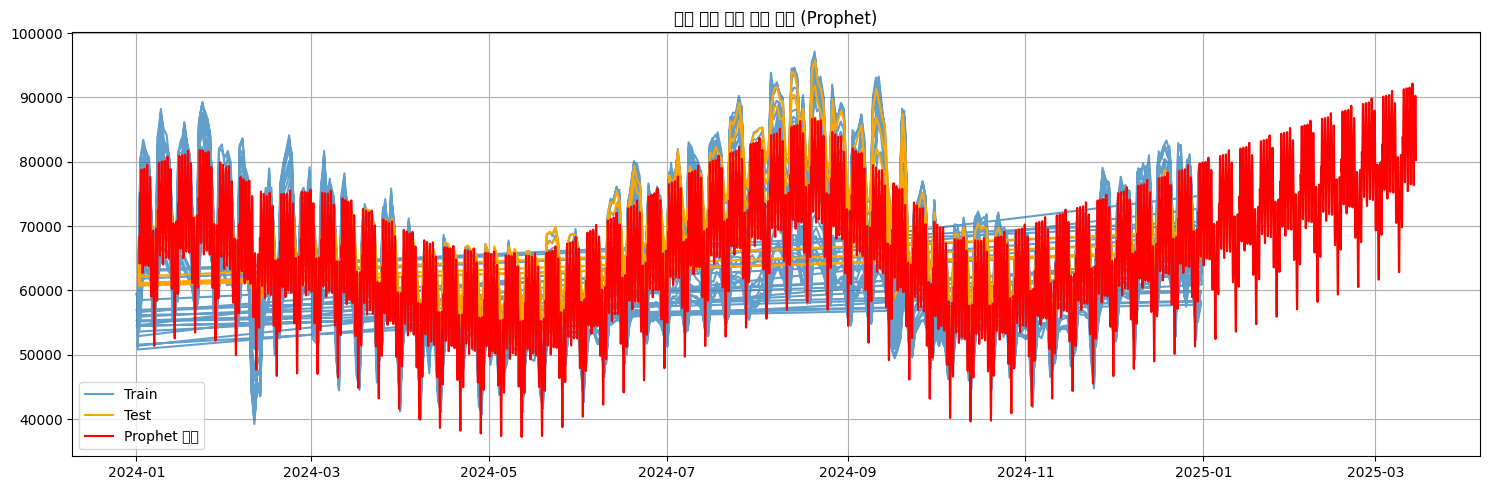

In [ ]:
# Prophet ÏÑ§Ïπò
# !pip install prophet --quiet

import pandas as pd
import matplotlib.pyplot as plt
from prophet import Prophet
from sklearn.metrics import mean_absolute_error, mean_squared_error

# 1. Îç∞Ïù¥ÌÑ∞ Î∂àÎü¨Ïò§Í∏∞ Î∞è Ï†ÑÏ≤òÎ¶¨ (wide ‚Üí long)
file_path = '/content/drive/MyDrive/ColabNotebooks/ÌïúÍµ≠Ï†ÑÎ†•Í±∞ÎûòÏÜå_ÏãúÍ∞ÑÎ≥Ñ Ï†ÑÍµ≠ Ï†ÑÎ†•ÏàòÏöîÎüâ_20241231.csv'
df = pd.read_csv(file_path, encoding='cp949')

# meltÎ°ú ÏÑ∏Î°úÌòï Î≥ÄÌôò
df_long = df.melt(id_vars='ÎÇ†Ïßú', var_name='ÏãúÍ∞Ñ', value_name='ÏàòÏöîÎüâ(MWh)')
df_long['ÏãúÍ∞Ñ'] = df_long['ÏãúÍ∞Ñ'].str.replace('Ïãú', '').astype(int)
df_long['ÏùºÏãú'] = pd.to_datetime(df_long['ÎÇ†Ïßú']) + pd.to_timedelta(df_long['ÏãúÍ∞Ñ'] - 1, unit='h')

# Prophet ÌòïÏãùÏúºÎ°ú Î≥ÄÌôò
df_prophet = df_long[['ÏùºÏãú', 'ÏàòÏöîÎüâ(MWh)']].rename(columns={'ÏùºÏãú': 'ds', 'ÏàòÏöîÎüâ(MWh)': 'y'})

# 2. train/test Î∂ÑÌï† (80:20)
split_idx = int(len(df_prophet) * 0.8)
train_df = df_prophet.iloc[:split_idx]
test_df = df_prophet.iloc[split_idx:]

# 3. Prophet Î™®Îç∏ ÌïôÏäµ
model = Prophet(daily_seasonality=True)
model.fit(train_df)

# 4. ÎØ∏Îûò ÌîÑÎ†àÏûÑ ÏÉùÏÑ± Î∞è ÏòàÏ∏° ÏàòÌñâ
future = model.make_future_dataframe(periods=len(test_df), freq='h')  # ÏãúÍ∞Ñ Îã®ÏúÑ
forecast = model.predict(future)

# 5. ÏòàÏ∏°Í∞í Î≥ëÌï© Î∞è ÌèâÍ∞ÄÏö© Ïú†Ìö® Íµ¨Í∞Ñ Ï∂îÏ∂ú
forecast_result = forecast[['ds', 'yhat']]
merged = pd.merge(test_df, forecast_result, on='ds', how='left')
valid_rows = merged.dropna(subset=['y', 'yhat'])

# 6. ÌèâÍ∞Ä ÏßÄÌëú Í≥ÑÏÇ∞
mae = mean_absolute_error(valid_rows['y'], valid_rows['yhat'])
rmse = mean_squared_error(valid_rows['y'], valid_rows['yhat']) ** 0.5
print(f"‚úÖ Prophet ÏòàÏ∏° Í≤∞Í≥º ‚Üí MAE: {mae:.2f}, RMSE: {rmse:.2f}")

# 7. ÏãúÍ∞ÅÌôî (ÏòàÏ∏°ÏÑ†ÏùÄ Test Í∏∞Í∞ÑÎßå Î≥¥Ïó¨Ï§å)
forecast_test_only = forecast[forecast['ds'] >= test_df['ds'].min()]

plt.figure(figsize=(15,5))
plt.plot(train_df['ds'], train_df['y'], label='Train', alpha=0.7)
plt.plot(test_df['ds'], test_df['y'], label='Test', color='orange')
plt.plot(forecast_test_only['ds'], forecast_test_only['yhat'], label='Prophet ÏòàÏ∏°', color='red')
plt.legend()
plt.title("ÏãúÍ∞Ñ Îã®ÏúÑ Ï†ÑÎ†• ÏàòÏöî ÏòàÏ∏° (Prophet)")
plt.grid(True)
plt.tight_layout()
plt.show()


<ipython-input-27-18a397a14dfb>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_rows['Ïõî'] = valid_rows['ds'].dt.to_period('M')  # Ïõî Îã®ÏúÑÎ°ú Î≥ÄÌôò
<ipython-input-27-18a397a14dfb>:16: UserWarning: Glyph 50900 (\N{HANGUL SYLLABLE WEOL}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-27-18a397a14dfb>:16: UserWarning: Glyph 49688 (\N{HANGUL SYLLABLE SU}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-27-18a397a14dfb>:16: UserWarning: Glyph 50836 (\N{HANGUL SYLLABLE YO}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-27-18a397a14dfb>:16: UserWarning: Glyph 47049 (\N{HANGUL SYLLABLE RYANG}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-27-18a397a14

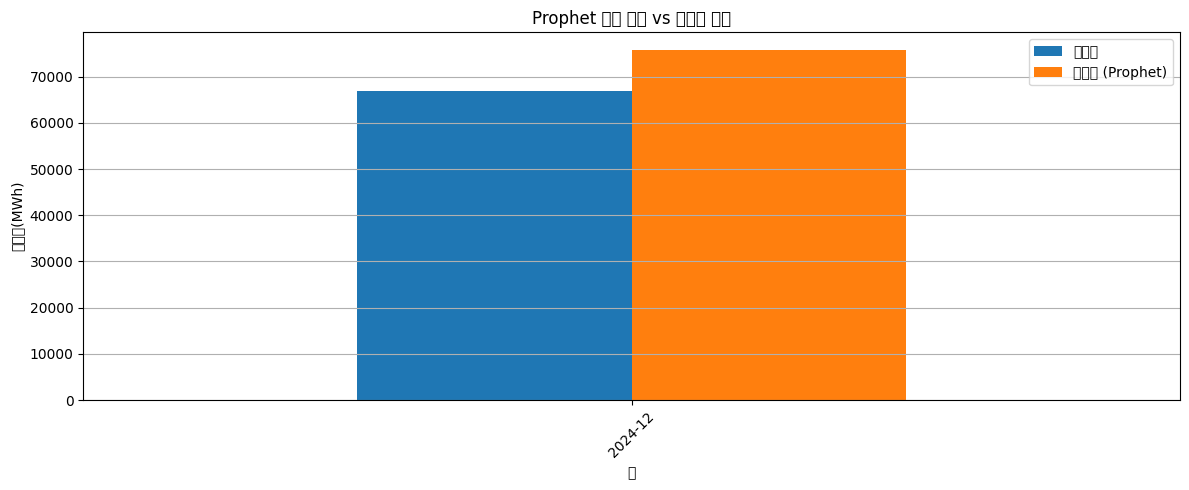

In [ ]:
# 1. ÏòàÏ∏°Í∞í Î≥ëÌï© (test_df + forecast ‚Üí merged)
forecast_result = forecast[['ds', 'yhat']]
merged = pd.merge(test_df, forecast_result, on='ds', how='left')
valid_rows = merged.dropna(subset=['y', 'yhat'])

# 2. Ïõî Îã®ÏúÑÎ°ú Í∑∏Î£πÌôîÌï¥ÏÑú ÌèâÍ∑† ÏàòÏöîÎüâ ÎπÑÍµê
valid_rows['Ïõî'] = valid_rows['ds'].dt.to_period('M')  # Ïõî Îã®ÏúÑÎ°ú Î≥ÄÌôò

monthly_comparison = valid_rows.groupby('Ïõî')[['y', 'yhat']].mean()
monthly_comparison = monthly_comparison.rename(columns={'y': 'Ïã§Ï†úÍ∞í', 'yhat': 'ÏòàÏ∏°Í∞í (Prophet)'})

# 3. ÏãúÍ∞ÅÌôî
monthly_comparison.plot(kind='bar', figsize=(12,5), title="Prophet ÏõîÎ≥Ñ ÏòàÏ∏° vs Ïã§Ï†úÍ∞í ÎπÑÍµê", ylabel='ÏàòÏöîÎüâ(MWh)')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()
